#IF706 - Introdução a Ciência de Dados
  ## Projeto 1: Análise Descritiva dos Dados
  ## Discente: Bruno Vinícius Gonçalves Mota
  ## Docente: Luciano Barbosa




### Apresentando os dados escolhidos para análise:

Os dados escolhidos para este Projeto foram os dados de aplicativos da Google Play Store disponibilizados como datasets no Kaggle, site de competições de Data Science. 

In [3]:
import pandas as pd
import numpy as np

from google.colab import files
uploaded = files.upload()
import io


Saving googleplaystore.csv to googleplaystore.csv
Saving googleplaystore_user_reviews.csv to googleplaystore_user_reviews.csv


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.float_format = '{:20,.6f}'.format

No conjunto de dados originais existem dois arquivos:  um que contém as informação mais diretas dos aplicativos da loja do Google e outro contendo uma análise de sentimentos realizada. Abaixo temos o dataset que será utilizado nesta análise contendo informações como categoria, número de reviews, versão do android, entre outras informações.

In [0]:
store = pd.read_csv(io.BytesIO(uploaded['googleplaystore.csv']))
store_reviews = pd.read_csv(io.BytesIO(uploaded['googleplaystore_user_reviews.csv']))

In [6]:
#Principal dataset para Análise do Projeto:
store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
#Dataset complementar com dados sobre a Análise de Sentimento realizada:
store_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
2,10 Best Foods for You,NaN,NaN,nan,nan
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000


Uma vez que foi observada a quantidade de linhas dos dois datasets(dados gerais sobre os aplicativos) foi decidido optar apenas por utilizar o principal já que o complementar(análise de sentimentos), apesar de ser interessante, contém poucas em linhas em contrapartida ao maior.

In [8]:
#Poucos apps no dataset de Análise de Sentimentos
store['App'].unique().shape, store_reviews['App'].unique().shape

((9660,), (1074,))

### Pré-Processamento dos Dados: **Tipos**

A maioria dos tipos são apenas genéricos(object no pandas) e há uma necessidade para atribuí-los de forma que faça mais sentido para representatividade dos mesmos. 

In [9]:
#Primeiro insight: Colocar os tipos para os certos, a maioria estão 'indetermindados'(objetos)
store.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Na primeira tentativa de colocar Reviews para o tipo int64 é descoberto que o dataset contém uma linha formatada de maneira errada. A maioria dos seus dados estão mal posicionadas para a esquerda. Logo, para a correção do tipo dos dados é necessário corrigir esta linha específica ou removê-lá. Para uma abordagem mais 'conservadora' dos dados foi optado investigar para procurar outras linhas como esta.

In [10]:
#Linha com dados errados. Necessário remover ou dar um 'shift' para direita.
store[store['Reviews'] == '3.0M']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.000000,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


O método que permite fazer uma busca por linhas parecidas é que se observamos as linhas com os seus dados corretamente formatados perceberemos que este campo específico na linha errada contém um dado que deveria pertencer a coluna Size. Uma característica desta coluna é a adição de um M no final do número. 

In [11]:
#Procurando outras linhas como a que está acima
store[store['Reviews'].str.contains('M', na=False)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.000000,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Uma vez encontrada esta única linha com este problema é decidido fazer um pequeno teste para viabilidade de seu uso para evitar perder informação.  Como mencionado acima, foi usado um shift para direita  e preenchendo os dados restantes de uma maneira manual baseando-se na versão errada original e nas outras linhas corretas. 

In [12]:
#Pré-processando esta linha específica(melhor retirar?)
#Esta linha também é a única que possui Rating > 5; provavelmente registrada errada
teste = store[store['Reviews'].str.contains('M', na=False)]
teste.loc[:, 'Reviews':] = teste.loc[:, 'Reviews':].shift(periods=1, axis='columns')
teste['Rating'] = '1.9'
teste['Category'] = np.nan
teste

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,nan,1.9,NaN,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up


Para evitar certos warnings do pandas é ideal fazer cópias no dataframe para operações como a acima. Usaremos new_store para indicar um dataset igual ao original ao qual será executado a tarefa de pré-processamento.

In [0]:
new_store = store.copy()

A coluna Category é bastante simples de ser decidida como categórica já que ela informa qual categoria da loja de aplicativos do Google cada aplicativo se encontra. 

In [0]:
new_store['Category'] = new_store['Category'].astype('category')

In [15]:
#Perguntar sobre a variável ser float64 ou category
store['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

Para colocar Reviews como int64 primeiramente será consertada a linha já mostrada errada. Posteriormente, é necessário remover NaNs da coluna Reviews ou não será possível a conversão. Foi decidido para flexibilidade que estas Reviews serão preenchidas com o valor zero, pois para esta coluna não é comprometida a exploração e análise.

In [16]:
preprocess_row = new_store[new_store['Reviews'].str.contains('M', na=False)]
preprocess_row.loc[:, 'Reviews':] = preprocess_row.loc[:, 'Reviews':].shift(periods=1, axis='columns')
preprocess_row['Rating'] = '1.9'
preprocess_row['Category'] = np.nan

new_store[new_store['Reviews'].str.contains('M', na=False)] = preprocess_row
new_store['Reviews'] = new_store['Reviews'].fillna(0).astype('int64')

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [17]:
#Reviews foi modificado para ficar com tipo int64
new_store[new_store['Reviews'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [18]:
#nova versão da linha errada
new_store[new_store['App'] == 'Life Made WI-Fi Touchscreen Photo Frame']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,NaN,1.9,0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up


É importante notar que agora Reviews possui 0 para onde antes era NaN. Observando mais cautelosamente os apps que isso comportamento acontece é acreditado que não tem muito problema dado que eles também não possuem informação sobre rating onde há uma possibilidade de ser por causa da quantidade relativamente baixa de instalações.

In [19]:
new_store[new_store['Reviews'] == 0].head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
478,Truth or Dare Pro,DATING,NaN,0,20M,50+,Paid,$1.49,Teen,Dating,"September 1, 2017",1.0,4.0 and up
479,"Private Dating, Hide App- Blue for PrivacyHider",DATING,NaN,0,18k,100+,Paid,$2.99,Everyone,Dating,"July 25, 2017",1.0.1,4.0 and up
621,Dating White Girls,DATING,NaN,0,3.6M,50+,Free,0,Mature 17+,Dating,"July 20, 2018",1.0,4.0 and up
623,Geeks Dating,DATING,NaN,0,13M,50+,Free,0,Mature 17+,Dating,"July 10, 2018",1.0,4.1 and up
627,CAM5678 Video Chat,DATING,NaN,0,39M,500+,Free,0,Mature 17+,Dating,"July 13, 2018",5.5.8,4.0.3 and up
628,Video chat live advices,DATING,NaN,0,8.0M,100+,Free,0,Everyone,Dating,"July 10, 2018",1.0,3.0 and up
630,Pet Lovers Dating,DATING,NaN,0,14M,10+,Free,0,Mature 17+,Dating,"July 9, 2018",1.0,4.1 and up
632,Latin Dating,DATING,NaN,0,13M,10+,Free,0,Mature 17+,Dating,"July 9, 2018",1.0,4.1 and up
635,Wifi Mingle,DATING,NaN,0,10.0M,10+,Free,0,Everyone,Dating,"July 27, 2018",1.3,4.4 and up
639,HOW TO ASK A GIRL OUT,DATING,NaN,0,19M,10+,Free,0,Everyone,Dating,"July 16, 2018",1.0,4.0.3 and up


Existe uma quantidade alta de diferentes Sizes por isso foi optado por deixá-lo como float64. Para fazer isso é necessário fazer um pré-processamento na coluna retirando o M de megabytes acompanhado do valor númerico assim como também um k de kbytes. Para deixar os valores de forma padronizada todos os valores da coluna passarão a ser em megabytes e novo nome da coluna para ser interpretável será Size(M). Por fim, um problema significante é da existência de um valor 'Varies with device' que foi escolhido deixá-lo como 0 para possibilitar a conversão.

In [0]:
#Alterando o nome de size para Size(M) e removendo o M dos sizes das colunas.
new_store = new_store.rename(columns={'Size':'Size(M)'})
new_store.loc[new_store.loc[:, 'Size(M)'] == 'Varies with device', 'Size(M)'] = '0'
new_store['Size(M)'] = new_store['Size(M)'].apply(lambda x: x.replace('M', '') if 'M' in x else str(float(x.replace('k', ''))/1000.0) if 'k' in x else x)
new_store['Size(M)'] = new_store['Size(M)'].astype('float64')


O tipo pode ser Free, Paid ou NaN. Serão representados como valores categóricos.

In [21]:
new_store['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [0]:
new_store['Type'] = new_store['Type'].astype('category')

Price é semelhante a Size pois está acompanhado de um caractere: o '$'. É removido de maneira semelhante ao M e agora a coluna ganha um novo nome para garantir a legibilidade.  O seu novo tipo passa a ser float64.

In [0]:
new_store = new_store.rename(columns={'Price': 'Price($)'})
new_store['Price($)'] = new_store['Price($)'].apply(lambda x: x.replace('$', ''))
new_store['Price($)'] = new_store['Price($)'].astype('float64')
#new_store[new_store['Price($)'] != 0.0]

In [24]:
#Exemplo mostrando como Price está no momento
new_store[new_store['Price($)'] != 0.0].head(2)

,App,Category,Rating,Reviews,Size(M),Installs,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.700000,11442,6.800000,"100,000+",Paid,4.990000,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.800000,10295,39.000000,"100,000+",Paid,4.990000,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up


Content Rating, Genres, Current Ver, Android Ver são todos categóricos e facimente modelados para tal.

In [0]:
new_store['Content Rating'] = new_store['Content Rating'].astype('category')
new_store['Genres'] = new_store['Genres'].astype('category')
new_store['Current Ver'] = new_store['Current Ver'].astype('category')
new_store['Android Ver'] = new_store['Android Ver'].astype('category')

Last Updated está diretamente relaiconado a data. Seu formato original é facilmente convertido para o datetime do pandas possibilitando operações especiais para este tipo.

In [26]:
#Checando como fica o tipo datetime na coluna Last Updated
new_store['Last Updated'] = pd.to_datetime(new_store['Last Updated'])
new_store.head(2)

,App,Category,Rating,Reviews,Size(M),Installs,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19.000000,"10,000+",Free,0.000000,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14.000000,"500,000+",Free,0.000000,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up


Não existem muitos valores em Installs mas  seus valores podem ser um pouco confusos para análise já que o número de installs na verdade é um número **mínimo** para tal tarefa. Para deixar o campo mais intuitivo foi removido o caractere '+' e a coluna explicitamente indica o mínimo de installs. O tipo para esta coluna é int64.

In [27]:
new_store['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [28]:
new_store = new_store.rename(columns={'Installs': 'MinimumInstalls'})
new_store['MinimumInstalls'] = new_store['MinimumInstalls'].str.replace('[,+]', '').astype('int64')
new_store.head(2)

,App,Category,Rating,Reviews,Size(M),MinimumInstalls,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19.000000,10000,Free,0.000000,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14.000000,500000,Free,0.000000,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up


Além de deixar uma versão mais clara em int64 podemos deixar uma versão discretizada em ranges para maior interpretabilidade no futuro caso necessitemos cada vez mais segmentar nossos questionamentos.

In [29]:
unique_installs = new_store['MinimumInstalls'].unique().flatten()
unique_installs.sort()
installs_labels = ['0 - 0'] + [f'{i[0]} - {i[1]}' for i in zip(unique_installs[1:], unique_installs[2:])]
range_installs = pd.cut(x=new_store['MinimumInstalls'], bins=unique_installs, labels=installs_labels, right=False)
new_store['RangeInstalls'] = range_installs
new_store = new_store[['App', 'Category', 'Rating', 'Reviews', 'Size(M)', 'MinimumInstalls', 'RangeInstalls', 'Type', 'Price($)', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']]
new_store.head(2)

,App,Category,Rating,Reviews,Size(M),MinimumInstalls,RangeInstalls,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19.000000,10000,10000 - 50000,Free,0.000000,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14.000000,500000,500000 - 1000000,Free,0.000000,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up


In [30]:
new_store['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4.0, nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5.0, 2.6, 3.0, 1.9, 2.5, 2.8,
       2.7, 1.0, 2.9, 2.3, 2.2, 1.7, 2.0, 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2, '1.9'], dtype=object)

In [0]:
new_store['Rating'] = new_store['Rating'].astype('float64')

In [32]:
#Vendo os tipos uma vez que a tarefa foi concluída
new_store.dtypes

App                        object
Category                 category
Rating                    float64
Reviews                     int64
Size(M)                   float64
MinimumInstalls             int64
RangeInstalls            category
Type                     category
Price($)                  float64
Content Rating           category
Genres                   category
Last Updated       datetime64[ns]
Current Ver              category
Android Ver              category
dtype: object

### Pré-processamento dos dados: Linhas duplicadas

In [33]:
#Checando a quantidade de linhas e colunas totais do dataset
new_store.shape

(10841, 14)

In [34]:
#Checando os campos vazios
new_store.isna().sum()

App                   0
Category              1
Rating             1474
Reviews               0
Size(M)               0
MinimumInstalls       0
RangeInstalls        58
Type                  1
Price($)              0
Content Rating        0
Genres                1
Last Updated          0
Current Ver           8
Android Ver           2
dtype: int64

Depois de uma certa investigação é concluído que este dataset possui diversas linhas duplicadas o que pode atrapalhar a análise posteriori e por isso as mesmas devem ser tratadas. O primeiro tipo de duplicação são linhas exatamente iguais. Apenas uma deve ser mantida e as demais excluídas.

In [35]:
#Linhas exatamente iguais. Apenas uma deve ser mantida.
#new_store[new_store.duplicated()]
new_store[new_store['App'] == 'Google My Business']

,App,Category,Rating,Reviews,Size(M),MinimumInstalls,RangeInstalls,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
193,Google My Business,BUSINESS,4.400000,70991,0.000000,5000000,5000000 - 10000000,Free,0.000000,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up
239,Google My Business,BUSINESS,4.400000,70991,0.000000,5000000,5000000 - 10000000,Free,0.000000,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up
268,Google My Business,BUSINESS,4.400000,70991,0.000000,5000000,5000000 - 10000000,Free,0.000000,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up


In [36]:
new_store = new_store.drop_duplicates()
new_store.shape

(10358, 14)

In [37]:
#Apenas uma versão
new_store[new_store['App'] == 'Google My Business']

,App,Category,Rating,Reviews,Size(M),MinimumInstalls,RangeInstalls,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
193,Google My Business,BUSINESS,4.400000,70991,0.000000,5000000,5000000 - 10000000,Free,0.000000,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up


Outro tipo de duplicação é quando temos apenas Reviews diferentes e todos os outros campos duplicados. A técnica para este problema é deixar apenas uma e guardar  a mediana das reviews de todas as duplicações. A coluna Reviews é substituída pela mediana das Reviews. A mediana foi escolhida devida sua robustez a outliers.  

In [38]:
new_store[new_store['App'] == 'Google News']

,App,Category,Rating,Reviews,Size(M),MinimumInstalls,RangeInstalls,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
3736,Google News,NEWS_AND_MAGAZINES,3.900000,877635,13.000000,1000000000,NaN,Free,0.000000,Teen,News & Magazines,2018-08-01,5.2.0,4.4 and up
3816,Google News,NEWS_AND_MAGAZINES,3.900000,877643,13.000000,1000000000,NaN,Free,0.000000,Teen,News & Magazines,2018-08-01,5.2.0,4.4 and up
9844,Google News,NEWS_AND_MAGAZINES,3.900000,878065,13.000000,1000000000,NaN,Free,0.000000,Teen,News & Magazines,2018-08-01,5.2.0,4.4 and up


In [39]:
reviews_median = new_store[['App', 'Reviews']].groupby(new_store['App']).transform('median')
new_store['Reviews'] = reviews_median
new_store = new_store.drop_duplicates(subset=['App', 'Category'], keep='first') 
new_store[new_store['App'] == 'Google News']

,App,Category,Rating,Reviews,Size(M),MinimumInstalls,RangeInstalls,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
3736,Google News,NEWS_AND_MAGAZINES,3.900000,"877,643.000000",13.000000,1000000000,NaN,Free,0.000000,Teen,News & Magazines,2018-08-01,5.2.0,4.4 and up


In [40]:
#Linhas que permanecem duplicadas em App mas possuem categorias distintas
new_store[new_store.duplicated(subset='App')].head()

,App,Category,Rating,Reviews,Size(M),MinimumInstalls,RangeInstalls,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
436,Call Blocker,COMMUNICATION,4.100000,"103,185.000000",10.000000,1000000,1000000 - 5000000,Free,0.000000,Everyone,Communication,2018-07-26,5.86,4.0.3 and up
2014,YouTube Kids,FAMILY,4.500000,"470,391.500000",0.000000,50000000,50000000 - 100000000,Free,0.000000,Everyone,Entertainment;Music & Video,2018-08-03,3.43.3,4.1 and up
2015,Candy Bomb,FAMILY,4.400000,"42,145.000000",20.000000,10000000,10000000 - 50000000,Free,0.000000,Everyone,Casual;Brain Games,2018-07-04,2.9.3181,4.0.3 and up
2016,ROBLOX,FAMILY,4.500000,"4,449,882.000000",67.000000,100000000,100000000 - 500000000,Free,0.000000,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
2024,Solitaire,FAMILY,4.400000,"154,264.000000",26.000000,100000,100000 - 500000,Free,0.000000,Everyone,Card;Brain Games,2018-07-16,1.7.101,4.1 and up


In [41]:
#Exemplo prático de como estas linhas podem diferenciar.
print(new_store[(new_store.duplicated(subset='App'))].shape)
print(new_store[(new_store.duplicated(subset='App')) & (new_store['Category'] == 'FAMILY')].shape)

(85, 14)
(77, 14)


In [42]:
#Outro exemplo com um app específico
new_store[new_store['App'] == 'Netflix']

,App,Category,Rating,Reviews,Size(M),MinimumInstalls,RangeInstalls,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
855,Netflix,ENTERTAINMENT,4.400000,"5,456,403.500000",0.000000,100000000,100000000 - 500000000,Free,0.000000,Teen,Entertainment,2018-07-31,Varies with device,Varies with device
3889,Netflix,FAMILY,4.400000,"5,456,403.500000",0.000000,100000000,100000000 - 500000000,Free,0.000000,Teen,Entertainment,2018-07-31,Varies with device,Varies with device


Analisando bem a situação apresentada é chegada a conclusão que é a maioria destes apps duplicados em categorias diferentes são da categoria FAMILY. Mas por que isto acontece? Porque FAMILY segundo o próprio domínio de negócio estudado(google play store), FAMILY não é category mas sim estaria mais para uma feature binária que inclusive pode ter suas 'categorias'. Logo será construída esta a feature binária para indicar se um app é ou não FAMILY. Perceba que o outro valor para Category(duplicação) é o valor da categoria real do app. Os outros apps que não são da category FAMILY  mas aparecem com categorias duplicadas para o mesmo nome de app é porque possuem nomes genéricos, ou seja, nomes que não são capazes de identificá-los exclusivamente e possuem apps na loja com nomes iguais. Ex: Call Blocker.

In [43]:
#Adicionando feature categórica isFamily
new_store['isFamily'] = 0
new_store['isFamily'].loc[new_store['Category'] == 'FAMILY'] = 1
new_store['isFamily'] = new_store['isFamily'].astype('category')
new_store[new_store['Category'] == 'FAMILY'].head()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,App,Category,Rating,Reviews,Size(M),MinimumInstalls,RangeInstalls,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver,isFamily
2014,YouTube Kids,FAMILY,4.500000,"470,391.500000",0.000000,50000000,50000000 - 100000000,Free,0.000000,Everyone,Entertainment;Music & Video,2018-08-03,3.43.3,4.1 and up,1
2015,Candy Bomb,FAMILY,4.400000,"42,145.000000",20.000000,10000000,10000000 - 50000000,Free,0.000000,Everyone,Casual;Brain Games,2018-07-04,2.9.3181,4.0.3 and up,1
2016,ROBLOX,FAMILY,4.500000,"4,449,882.000000",67.000000,100000000,100000000 - 500000000,Free,0.000000,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up,1
2017,Jewels Crush- Match 3 Puzzle,FAMILY,4.400000,"14,774.000000",19.000000,1000000,1000000 - 5000000,Free,0.000000,Everyone,Casual;Brain Games,2018-07-23,1.9.3901,4.0.3 and up,1
2018,Coloring & Learn,FAMILY,4.400000,"12,753.000000",51.000000,5000000,5000000 - 10000000,Free,0.000000,Everyone,Educational;Creativity,2018-07-17,1.49,4.0.3 and up,1


Uma vez que se tem quais apps são FAMILY separadamente dos que não são é preciso permanecer apenas com usa categoria real. É possível utilizar a coluna de Genres para isso por que ela é formatada da maneira que o primeiro termo é a Category para apps comuns ou uma informação que será chamada de GameCategory se o App for um jogo, o que é possível saber porque na google play store temos todas as categorias de jogos possíves, enquanto o segundo termo é o que será chamado de FamilyCategory, exclusivo se o app for para família e possível de derivar do mesmo método que o citado anteriormente. 

In [44]:
new_store[new_store['Genres'] == 'Educational;Creativity']

,App,Category,Rating,Reviews,Size(M),MinimumInstalls,RangeInstalls,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver,isFamily
2018,Coloring & Learn,FAMILY,4.400000,"12,753.000000",51.000000,5000000,5000000 - 10000000,Free,0.000000,Everyone,Educational;Creativity,2018-07-17,1.49,4.0.3 and up,1
2062,Toca Mystery House,FAMILY,4.200000,96.000000,79.000000,5000,5000 - 10000,Paid,3.990000,Everyone,Educational;Creativity,2018-06-14,1.0.1,4.4 and up,1
2087,Pinkalicious Party,FAMILY,3.000000,2.000000,82.000000,500,500 - 1000,Paid,2.990000,Everyone,Educational;Creativity,2018-06-25,1.5.0,4.1 and up,1
9404,Princess Palace: Royal Pony,FAMILY,4.400000,"11,442.000000",66.000000,1000000,1000000 - 5000000,Free,0.000000,Everyone,Educational;Creativity,2016-06-30,1.4,2.3 and up,1
9475,Pet Beauty Salon,FAMILY,3.800000,"20,292.000000",47.000000,1000000,1000000 - 5000000,Free,0.000000,Everyone,Educational;Creativity,2015-05-24,1.2,2.3 and up,1


In [45]:
print(list(new_store['Genres'].unique()))


['Art & Design', 'Art & Design;Pretend Play', 'Art & Design;Creativity', 'Art & Design;Action & Adventure', 'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business', 'Comics', 'Comics;Creativity', 'Communication', 'Dating', 'Education;Education', 'Education', 'Education;Creativity', 'Education;Music & Video', 'Education;Action & Adventure', 'Education;Pretend Play', 'Education;Brain Games', 'Entertainment', 'Entertainment;Music & Video', 'Entertainment;Brain Games', 'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink', 'Health & Fitness', 'House & Home', 'Libraries & Demo', 'Lifestyle', 'Lifestyle;Pretend Play', 'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card', 'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports', 'Music', 'Word', 'Racing', 'Casual;Creativity', 'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board', 'Trivia', 'Role Playing', 'Simulation;Education', 'Action;Action & Adventure', 'Casual;Brain Games', 'Simulation;Action & Adven

In [46]:
#separando por categoria a partir dos gêneros
def category_by_genres(genre):
  if type(genre) == float:
    return 'NaN'
  genre = genre.split(';')[0]
  game_genres = ['Adventure', 'Arcade', 'Casual', 'Card', 'Action', 'Strategy', 
                'Puzzle', 'Sports', 'Music', 'Word', 'Racing', 'Simulation',
                'Board', 'Trivia', 'Role Playing', 'Casino', 'Educational']
  
  if(genre in game_genres):
    return 'GAME'
  else:
    return genre.upper()
  
new_store['Category'] = new_store['Category'].astype('object')
new_store['Category'].loc[new_store['App'] == 'Life Made WI-Fi Touchscreen Photo Frame'] = 'LIFESTYLE'
new_store['Genres'].loc[new_store['App'] == 'Life Made WI-Fi Touchscreen Photo Frame'] = 'Lifestyle'
new_store.loc[new_store['Category'] == 'FAMILY', ['Category']] = new_store.apply(lambda row: category_by_genres(row['Genres']), axis=1) 
new_store['Category'] = new_store['Category'].astype('category')
new_store[new_store['App'] == 'Princess Palace: Royal Pony']

new_store.loc[new_store['Category'] == 'ART & DESIGN', ['Category']] = 'ART_AND_DESIGN'
new_store.loc[new_store['Category'] == 'BOOKS & REFERENCE', ['Category']] = 'BOOKS_AND_REFERENCE'
new_store.loc[new_store['Category'] == 'HEALTH & FITNESS', ['Category']] = 'HEALTH_AND_FITNESS'
new_store.loc[new_store['Category'] == 'VIDEO_PLAYERS', ['Category']] = 'VIDEO PLAYERS & EDITORS'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [47]:
#separando família pelo genre

def family_category(genre):
  if type(genre) == float:
    return 'NaN'
  genre = genre.split(';')
  if len(genre) < 2:
    return 'NaN'
  else:
    return genre[1].upper()

new_store['FamilyCategory'] = new_store.apply(lambda row: family_category(row['Genres']) if row['isFamily'] else 'NaN', axis=1)
new_store[new_store['isFamily'] == 1].head()


,App,Category,Rating,Reviews,Size(M),MinimumInstalls,RangeInstalls,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver,isFamily,FamilyCategory
2014,YouTube Kids,ENTERTAINMENT,4.500000,"470,391.500000",0.000000,50000000,50000000 - 100000000,Free,0.000000,Everyone,Entertainment;Music & Video,2018-08-03,3.43.3,4.1 and up,1,MUSIC & VIDEO
2015,Candy Bomb,GAME,4.400000,"42,145.000000",20.000000,10000000,10000000 - 50000000,Free,0.000000,Everyone,Casual;Brain Games,2018-07-04,2.9.3181,4.0.3 and up,1,BRAIN GAMES
2016,ROBLOX,GAME,4.500000,"4,449,882.000000",67.000000,100000000,100000000 - 500000000,Free,0.000000,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up,1,ACTION & ADVENTURE
2017,Jewels Crush- Match 3 Puzzle,GAME,4.400000,"14,774.000000",19.000000,1000000,1000000 - 5000000,Free,0.000000,Everyone,Casual;Brain Games,2018-07-23,1.9.3901,4.0.3 and up,1,BRAIN GAMES
2018,Coloring & Learn,GAME,4.400000,"12,753.000000",51.000000,5000000,5000000 - 10000000,Free,0.000000,Everyone,Educational;Creativity,2018-07-17,1.49,4.0.3 and up,1,CREATIVITY


In [48]:
#separando categoria do jogo pelo genre
def game_category(genre):
  if type(genre) == float:
    return 'NaN'
  genre = genre.split(';')[0]
  return genre.upper()

new_store['GameCategory'] = new_store.apply(lambda row: game_category(row['Genres']) if row['Category'] == 'GAME' else 'NaN', axis=1)
new_store[new_store['App'] == 'Netflix']

,App,Category,Rating,Reviews,Size(M),MinimumInstalls,RangeInstalls,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver,isFamily,FamilyCategory,GameCategory
855,Netflix,ENTERTAINMENT,4.400000,"5,456,403.500000",0.000000,100000000,100000000 - 500000000,Free,0.000000,Teen,Entertainment,2018-07-31,Varies with device,Varies with device,0,NaN,NaN
3889,Netflix,ENTERTAINMENT,4.400000,"5,456,403.500000",0.000000,100000000,100000000 - 500000000,Free,0.000000,Teen,Entertainment,2018-07-31,Varies with device,Varies with device,1,NaN,NaN


In [49]:
#Eliminando duplicacaçõas
new_store = new_store.sort_values(by='isFamily')
print(new_store[new_store['isFamily'] == '1'].shape)
new_store.drop_duplicates(subset='App', keep='last', inplace=True)
print(new_store[new_store['isFamily'] == '0'].shape)
new_store[new_store['App'] == 'ROBLOX']


(0, 17)
(0, 17)


,App,Category,Rating,Reviews,Size(M),MinimumInstalls,RangeInstalls,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver,isFamily,FamilyCategory,GameCategory
2016,ROBLOX,GAME,4.500000,"4,449,882.000000",67.000000,100000000,100000000 - 500000000,Free,0.000000,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up,1,ACTION & ADVENTURE,ADVENTURE


In [50]:
new_store[new_store.duplicated(subset=['App', 'Category'])]

,App,Category,Rating,Reviews,Size(M),MinimumInstalls,RangeInstalls,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver,isFamily,FamilyCategory,GameCategory


In [51]:
new_store[new_store.duplicated(subset='App')].shape

(0, 17)

### Pré-processamento de dados: Remoção e Consistência

A coluna que mais possui dados faltando é de Rating porém devido a este grande valor não será vantajoso fazer a imputação. Para as demais que possuem poucos valores faltando também não faremos já que são de natureza categórica e não tão cruciais para análise.

In [52]:
new_store.isna().sum()

App                   0
Category              0
Rating             1463
Reviews               0
Size(M)               0
MinimumInstalls       0
RangeInstalls        20
Type                  1
Price($)              0
Content Rating        0
Genres                0
Last Updated          0
Current Ver           8
Android Ver           2
isFamily              0
FamilyCategory        0
GameCategory          0
dtype: int64

Checando se todos os que tem preço 0 possuem o tipo Free para evitar incosistências.

In [53]:
new_store[(new_store['Type'] == 'Free') & (new_store['Price($)'] == 0.0)].shape[0] == new_store[(new_store['Type'] == 'Free')].shape[0]

True

### Pré-Processamento de Dados: Detecção de Outliers

In [54]:
new_store['Reviews'].describe()

count           9,660.000000
mean          216,626.441304
std         1,831,124.571485
min                 0.000000
25%                25.000000
50%               969.000000
75%            29,420.250000
max        78,143,257.000000
Name: Reviews, dtype: float64

Agora será checado se existem dados muito distantes do todo utilizando diferentes técnicas. A seguir será mostrada detecção univariada  com o mad e z-score robusto.

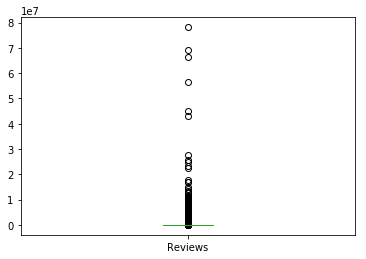

In [55]:
new_store.loc[np.isfinite(new_store['Reviews']), ['Reviews']].plot.box()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6499fd9438>]],
      dtype=object)

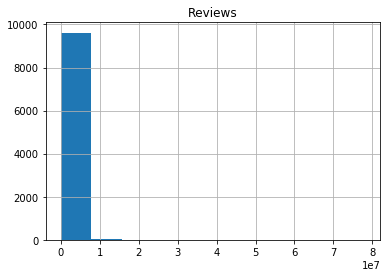

In [56]:
new_store.loc[np.isfinite(new_store['Reviews']), ['Reviews']].hist()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6499ee4c18>]],
      dtype=object)

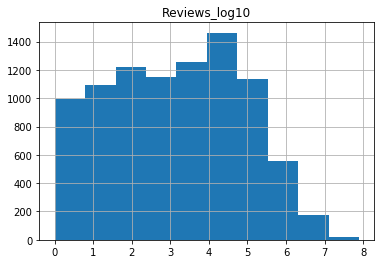

In [57]:
new_store['Reviews_log10'] = np.log10(new_store['Reviews'])
new_store.loc[np.isfinite(new_store['Reviews_log10']), ['Reviews_log10']].hist()

In [58]:
mad_reviews = abs(new_store['Reviews_log10'] - new_store['Reviews_log10'].median()).median()*(1/0.6745)
mad_reviews

2.259809245934357

Os outliers encontrados estão muito agregados aquela transformação no início de decidir reviews como 0, logo eles aparecem aqui faz todo sentido e não devem ser removidos já que pode comprometer a futura análise.

In [59]:
new_store[abs(new_store['Reviews_log10']-new_store['Reviews_log10'].median())/mad_reviews > 3.5]


,App,Category,Rating,Reviews,Size(M),MinimumInstalls,RangeInstalls,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver,isFamily,FamilyCategory,GameCategory,Reviews_log10
6962,Kick Axe Bx,HEALTH_AND_FITNESS,nan,0.000000,9.300000,1,1 - 5,Free,0.000000,Everyone,Health & Fitness,2017-06-07,1.0.1,4.0 and up,0,NaN,NaN,-inf
7049,BZ Langenthaler Tagblatt E-Paper,NEWS_AND_MAGAZINES,nan,0.000000,0.000000,10,10 - 50,Free,0.000000,Everyone,News & Magazines,2018-07-30,5.1.1,4.1 and up,0,NaN,NaN,-inf
7047,Dragon B.Z Wallpapers,PERSONALIZATION,nan,0.000000,3.800000,10,10 - 50,Free,0.000000,Everyone,Personalization,2018-05-06,2.1,4.0.3 and up,0,NaN,NaN,-inf
6915,Learn SAP BW on HANA,BOOKS_AND_REFERENCE,nan,0.000000,13.000000,500,500 - 1000,Free,0.000000,Everyone,Books & Reference,2018-02-13,1.1,4.0 and up,0,NaN,NaN,-inf
6912,BW SmartLife,TOOLS,nan,0.000000,8.800000,100,100 - 500,Free,0.000000,Everyone,Tools,2017-12-05,1.1.8,4.1 and up,0,NaN,NaN,-inf
6893,Home Remedies for Bacterial Infections,HEALTH_AND_FITNESS,nan,0.000000,4.400000,50,50 - 100,Free,0.000000,Everyone,Health & Fitness,2018-04-19,1.0,2.2 and up,0,NaN,NaN,-inf
6890,PIO bv Transport App,BUSINESS,nan,0.000000,73.000000,5,5 - 10,Free,0.000000,Everyone,Business,2018-03-22,1.0.0,4.1 and up,0,NaN,NaN,-inf
6888,BV Productions,BUSINESS,nan,0.000000,2.800000,1,1 - 5,Free,0.000000,Everyone,Business,2016-10-25,1.0.1,4.0 and up,0,NaN,NaN,-inf
6917,BW Ultra,PRODUCTIVITY,nan,0.000000,24.000000,10,10 - 50,Free,0.000000,Everyone,Productivity,2018-07-03,1.0,4.0 and up,0,NaN,NaN,-inf
6918,BW-IVMS,PRODUCTIVITY,nan,0.000000,17.000000,100,100 - 500,Free,0.000000,Everyone,Productivity,2018-07-26,12.0.18071400,4.1 and up,0,NaN,NaN,-inf


In [60]:
q1_reviews = new_store['Reviews_log10'].quantile(q=0.25)
q3_reviews = new_store['Reviews_log10'].quantile(q=0.75)
iqr_reviews = q3_reviews - q1_reviews
print(iqr_reviews)

3.0707063294340644


In [61]:
new_store[new_store['Reviews_log10'] < (q1_reviews-1.5*iqr_reviews)]

,App,Category,Rating,Reviews,Size(M),MinimumInstalls,RangeInstalls,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver,isFamily,FamilyCategory,GameCategory,Reviews_log10
6962,Kick Axe Bx,HEALTH_AND_FITNESS,nan,0.000000,9.300000,1,1 - 5,Free,0.000000,Everyone,Health & Fitness,2017-06-07,1.0.1,4.0 and up,0,NaN,NaN,-inf
7049,BZ Langenthaler Tagblatt E-Paper,NEWS_AND_MAGAZINES,nan,0.000000,0.000000,10,10 - 50,Free,0.000000,Everyone,News & Magazines,2018-07-30,5.1.1,4.1 and up,0,NaN,NaN,-inf
7047,Dragon B.Z Wallpapers,PERSONALIZATION,nan,0.000000,3.800000,10,10 - 50,Free,0.000000,Everyone,Personalization,2018-05-06,2.1,4.0.3 and up,0,NaN,NaN,-inf
6915,Learn SAP BW on HANA,BOOKS_AND_REFERENCE,nan,0.000000,13.000000,500,500 - 1000,Free,0.000000,Everyone,Books & Reference,2018-02-13,1.1,4.0 and up,0,NaN,NaN,-inf
6912,BW SmartLife,TOOLS,nan,0.000000,8.800000,100,100 - 500,Free,0.000000,Everyone,Tools,2017-12-05,1.1.8,4.1 and up,0,NaN,NaN,-inf
6893,Home Remedies for Bacterial Infections,HEALTH_AND_FITNESS,nan,0.000000,4.400000,50,50 - 100,Free,0.000000,Everyone,Health & Fitness,2018-04-19,1.0,2.2 and up,0,NaN,NaN,-inf
6890,PIO bv Transport App,BUSINESS,nan,0.000000,73.000000,5,5 - 10,Free,0.000000,Everyone,Business,2018-03-22,1.0.0,4.1 and up,0,NaN,NaN,-inf
6888,BV Productions,BUSINESS,nan,0.000000,2.800000,1,1 - 5,Free,0.000000,Everyone,Business,2016-10-25,1.0.1,4.0 and up,0,NaN,NaN,-inf
6917,BW Ultra,PRODUCTIVITY,nan,0.000000,24.000000,10,10 - 50,Free,0.000000,Everyone,Productivity,2018-07-03,1.0,4.0 and up,0,NaN,NaN,-inf
6918,BW-IVMS,PRODUCTIVITY,nan,0.000000,17.000000,100,100 - 500,Free,0.000000,Everyone,Productivity,2018-07-26,12.0.18071400,4.1 and up,0,NaN,NaN,-inf


In [62]:
new_store[new_store['Reviews_log10'] > (q3_reviews+1.5*iqr_reviews)]

,App,Category,Rating,Reviews,Size(M),MinimumInstalls,RangeInstalls,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver,isFamily,FamilyCategory,GameCategory,Reviews_log10


In [63]:
new_store['Size(M)'].describe()

count           9,660.000000
mean               17.799729
std                21.493713
min                 0.000000
25%                 2.900000
50%                 9.100000
75%                25.000000
max               100.000000
Name: Size(M), dtype: float64

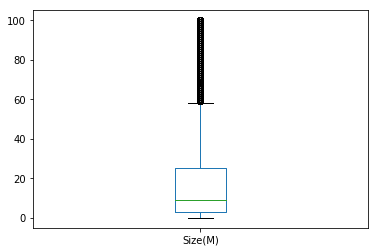

In [64]:
new_store.loc[np.isfinite(new_store['Size(M)']), ['Size(M)']].plot.box()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6499dc4780>]],
      dtype=object)

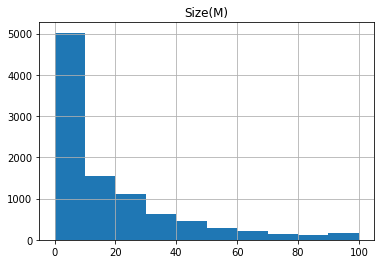

In [65]:
new_store.loc[np.isfinite(new_store['Size(M)']), ['Size(M)']].hist()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6499f5ad68>]],
      dtype=object)

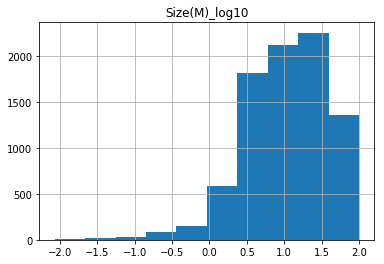

In [66]:
new_store['Size(M)_log10'] = np.log10(new_store['Size(M)'])
new_store.loc[np.isfinite(new_store['Size(M)_log10']), ['Size(M)_log10']].hist()

In [67]:
mad_size = abs(new_store['Size(M)_log10'] - new_store['Size(M)_log10'].median()).median()*(1/0.6745)
mad_size

0.6759554568565225

Em Size(M), mais uma vez o fenômeno se repete: como em Reviews, a maioria dos outliers são os que possuem 0 na coluna porém estes valores atribuídos para fazer a conversão de tipo já que originalmente eles não possuíam valores fixos. Não há razões reais para removê-los e jogar a informação fora.

In [68]:
new_store[abs(new_store['Size(M)_log10']-new_store['Size(M)_log10'].median())/mad_size > 3.5]

,App,Category,Rating,Reviews,Size(M),MinimumInstalls,RangeInstalls,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver,isFamily,FamilyCategory,GameCategory,Reviews_log10,Size(M)_log10
7012,Project Fi by Google,TOOLS,4.600000,"7,342.000000",0.000000,1000000,1000000 - 5000000,Free,0.000000,Everyone,Tools,2018-07-30,Varies with device,5.1 and up,0,NaN,NaN,3.865814,-inf
6987,Bitcoin Ticker Widget,FINANCE,4.600000,"25,744.000000",0.000000,500000,500000 - 1000000,Free,0.000000,Everyone,Finance,2018-07-30,Varies with device,Varies with device,0,NaN,NaN,4.410676,-inf
6982,"CoinMarketApp - CryptoCurrency Portfolio, News...",FINANCE,4.700000,"20,535.000000",0.000000,500000,500000 - 1000000,Free,0.000000,Everyone,Finance,2018-07-31,Varies with device,Varies with device,0,NaN,NaN,4.312495,-inf
6980,Mini Motor Racing WRT,GAME,4.200000,"107,497.000000",0.000000,1000000,1000000 - 5000000,Free,0.000000,Everyone,Racing,2016-02-02,Varies with device,2.3.3 and up,0,NaN,RACING,5.031396,-inf
6974,Lollipop Launcher Plus,PERSONALIZATION,4.100000,131.000000,0.027000,1000,1000 - 5000,Paid,4.990000,Everyone,Personalization,2015-03-08,1.0,4.0.3 and up,0,NaN,NaN,2.117271,-1.568636
7049,BZ Langenthaler Tagblatt E-Paper,NEWS_AND_MAGAZINES,nan,0.000000,0.000000,10,10 - 50,Free,0.000000,Everyone,News & Magazines,2018-07-30,5.1.1,4.1 and up,0,NaN,NaN,-inf,-inf
7040,BZ Berner Zeitung E-Paper,NEWS_AND_MAGAZINES,nan,4.000000,0.000000,1000,1000 - 5000,Free,0.000000,Everyone,News & Magazines,2018-07-30,5.1.1,4.1 and up,0,NaN,NaN,0.602060,-inf
6887,VictronConnect,TOOLS,3.800000,400.000000,0.000000,50000,50000 - 100000,Free,0.000000,Everyone,Tools,2018-07-05,4.8,4.1 and up,0,NaN,NaN,2.602060,-inf
6943,Bixby Button Remapper - bxActions Pro / Coffee,TOOLS,3.900000,319.000000,0.025000,10000,10000 - 50000,Paid,2.990000,Everyone,Tools,2017-04-28,1.00,7.0 and up,0,NaN,NaN,2.503791,-1.602060
7177,CD-Zing,BUSINESS,3.800000,70.000000,0.000000,1000,1000 - 5000,Free,0.000000,Everyone,Business,2016-10-26,6.2.7,4.0 and up,0,NaN,NaN,1.845098,-inf


In [69]:
q1_size = new_store['Size(M)_log10'].quantile(q=0.25)
q3_size = new_store['Size(M)_log10'].quantile(q=0.75)
iqr_size = q3_size - q1_size
print(iqr_size)

0.9355420107730816


In [70]:
new_store[new_store['Size(M)_log10'] < (q1_size-1.5*iqr_size)]

,App,Category,Rating,Reviews,Size(M),MinimumInstalls,RangeInstalls,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver,isFamily,FamilyCategory,GameCategory,Reviews_log10,Size(M)_log10
7012,Project Fi by Google,TOOLS,4.600000,"7,342.000000",0.000000,1000000,1000000 - 5000000,Free,0.000000,Everyone,Tools,2018-07-30,Varies with device,5.1 and up,0,NaN,NaN,3.865814,-inf
6987,Bitcoin Ticker Widget,FINANCE,4.600000,"25,744.000000",0.000000,500000,500000 - 1000000,Free,0.000000,Everyone,Finance,2018-07-30,Varies with device,Varies with device,0,NaN,NaN,4.410676,-inf
6985,Trinomial Factoring Wizard,TOOLS,4.000000,22.000000,0.082000,1000,1000 - 5000,Paid,0.990000,Everyone,Tools,2014-10-10,2.4,2.3 and up,0,NaN,NaN,1.342423,-1.086186
6982,"CoinMarketApp - CryptoCurrency Portfolio, News...",FINANCE,4.700000,"20,535.000000",0.000000,500000,500000 - 1000000,Free,0.000000,Everyone,Finance,2018-07-31,Varies with device,Varies with device,0,NaN,NaN,4.312495,-inf
6980,Mini Motor Racing WRT,GAME,4.200000,"107,497.000000",0.000000,1000000,1000000 - 5000000,Free,0.000000,Everyone,Racing,2016-02-02,Varies with device,2.3.3 and up,0,NaN,RACING,5.031396,-inf
6974,Lollipop Launcher Plus,PERSONALIZATION,4.100000,131.000000,0.027000,1000,1000 - 5000,Paid,4.990000,Everyone,Personalization,2015-03-08,1.0,4.0.3 and up,0,NaN,NaN,2.117271,-1.568636
7049,BZ Langenthaler Tagblatt E-Paper,NEWS_AND_MAGAZINES,nan,0.000000,0.000000,10,10 - 50,Free,0.000000,Everyone,News & Magazines,2018-07-30,5.1.1,4.1 and up,0,NaN,NaN,-inf,-inf
7040,BZ Berner Zeitung E-Paper,NEWS_AND_MAGAZINES,nan,4.000000,0.000000,1000,1000 - 5000,Free,0.000000,Everyone,News & Magazines,2018-07-30,5.1.1,4.1 and up,0,NaN,NaN,0.602060,-inf
6887,VictronConnect,TOOLS,3.800000,400.000000,0.000000,50000,50000 - 100000,Free,0.000000,Everyone,Tools,2018-07-05,4.8,4.1 and up,0,NaN,NaN,2.602060,-inf
6943,Bixby Button Remapper - bxActions Pro / Coffee,TOOLS,3.900000,319.000000,0.025000,10000,10000 - 50000,Paid,2.990000,Everyone,Tools,2017-04-28,1.00,7.0 and up,0,NaN,NaN,2.503791,-1.602060


In [71]:
new_store[new_store['Size(M)_log10'] > (q3_reviews+1.5*iqr_reviews)]

,App,Category,Rating,Reviews,Size(M),MinimumInstalls,RangeInstalls,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver,isFamily,FamilyCategory,GameCategory,Reviews_log10,Size(M)_log10


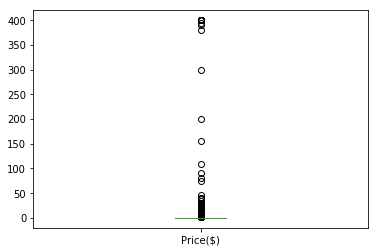

In [72]:
new_store.loc[np.isfinite(new_store['Price($)']), ['Price($)']].plot.box()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6499cda518>]],
      dtype=object)

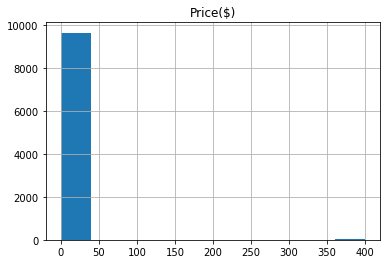

In [73]:
new_store.loc[np.isfinite(new_store['Price($)']), ['Price($)']].hist()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6499a16b70>]],
      dtype=object)

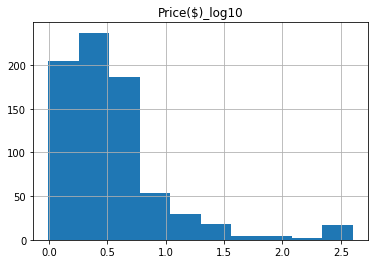

In [74]:
new_store['Price($)_log10'] = np.log10(new_store['Price($)'])
new_store.loc[np.isfinite(new_store['Price($)_log10']), ['Price($)_log10']].hist()

In [75]:
mad_price = abs(new_store['Price($)_log10'] - new_store['Price($)_log10'].median()).median()*(1/0.6745)
mad_price

inf

In [76]:
q1_price = new_store['Price($)_log10'].quantile(q=0.25)
q3_price = new_store['Price($)_log10'].quantile(q=0.75)
iqr_price = q3_price - q1_price
print(iqr_price)

nan


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [77]:
new_store[new_store['Price($)_log10'] < (q1_price-1.5*iqr_price)]

,App,Category,Rating,Reviews,Size(M),MinimumInstalls,RangeInstalls,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver,isFamily,FamilyCategory,GameCategory,Reviews_log10,Size(M)_log10,Price($)_log10


In [78]:
new_store[new_store['Price($)_log10'] > (q3_price+1.5*iqr_price)]

,App,Category,Rating,Reviews,Size(M),MinimumInstalls,RangeInstalls,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver,isFamily,FamilyCategory,GameCategory,Reviews_log10,Size(M)_log10,Price($)_log10


Agora será realizado a detecção de outlier bivariada. Usaremos para este a razão do preço do app por Reviews.

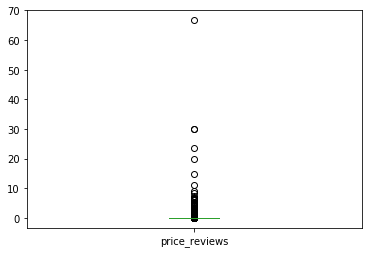

In [79]:
new_store['price_reviews'] = new_store['Price($)']/new_store['Reviews']
new_store['price_reviews'].plot.box()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6499920320>]],
      dtype=object)

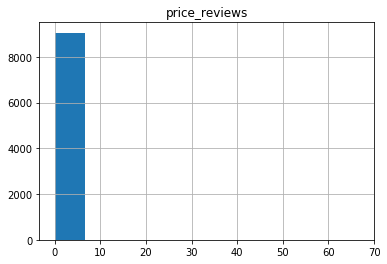

In [80]:
new_store.loc[np.isfinite(new_store['price_reviews']), ['price_reviews']].hist()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


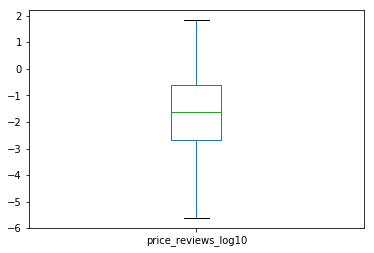

In [81]:
new_store['price_reviews_log10'] = np.log10(new_store['price_reviews'])
new_store.loc[np.isfinite(new_store['price_reviews_log10']), ['price_reviews_log10']].plot.box()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f649985a630>]],
      dtype=object)

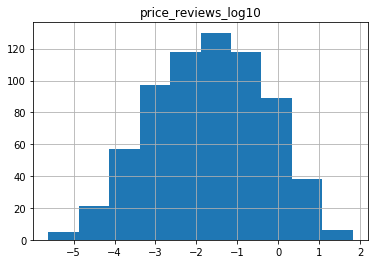

In [82]:
new_store.loc[np.isfinite(new_store['price_reviews_log10']), ['price_reviews_log10']].hist()

In [83]:
mad_price_reviews = abs(new_store['price_reviews_log10'] - new_store['price_reviews_log10'].median()).median()*(1/0.6745)
mad_price_reviews

inf

Como já esperado pelo conhecimento das transformações anteriores, alguns dos valores com Reviews 0 apareceram. Porém desta vez, um número maior de outliers do que a excução univariada isolada. Esta ocorrência se deve a influência das duas variáveis simultaneamente no procedimento.

In [84]:
new_store[abs(new_store['price_reviews_log10']-new_store['price_reviews_log10'].median())/mad_size > 3.5]

,App,Category,Rating,Reviews,Size(M),MinimumInstalls,RangeInstalls,Type,Price($),Content Rating,...,Current Ver,Android Ver,isFamily,FamilyCategory,GameCategory,Reviews_log10,Size(M)_log10,Price($)_log10,price_reviews,price_reviews_log10
6985,Trinomial Factoring Wizard,TOOLS,4.000000,22.000000,0.082000,1000,1000 - 5000,Paid,0.990000,Everyone,...,2.4,2.3 and up,0,NaN,NaN,1.342423,-1.086186,-0.004365,0.045000,-1.346787
6974,Lollipop Launcher Plus,PERSONALIZATION,4.100000,131.000000,0.027000,1000,1000 - 5000,Paid,4.990000,Everyone,...,1.0,4.0.3 and up,0,NaN,NaN,2.117271,-1.568636,0.698101,0.038092,-1.419171
7037,BZ Reminder PRO,BUSINESS,4.800000,726.000000,5.400000,1000,1000 - 5000,Paid,3.990000,Everyone,...,2.3.3,4.1 and up,0,NaN,NaN,2.860937,0.732394,0.600973,0.005496,-2.259964
6897,Watch Face BW Inter,PERSONALIZATION,3.100000,112.000000,8.800000,1000,1000 - 5000,Paid,0.990000,Everyone,...,2.1.7,4.3 and up,0,NaN,NaN,2.049218,0.944483,-0.004365,0.008839,-2.053583
6895,BW-Go,GAME,4.800000,265.000000,1.300000,1000,1000 - 5000,Paid,3.490000,Everyone,...,4.8.1,2.3 and up,0,NaN,BOARD,2.423246,0.113943,0.542825,0.013170,-1.880420
6886,My Budget Book,FINANCE,4.700000,"19,784.000000",7.300000,100000,100000 - 500000,Paid,2.990000,Everyone,...,7.6,4.0 and up,0,NaN,NaN,4.296314,0.863323,0.475671,0.000151,-3.820643
6948,Bitcoin BX Thailand PRO,FINANCE,1.700000,21.000000,21.000000,100,100 - 500,Paid,4.990000,Everyone,...,5.0,4.0.3 and up,0,NaN,NaN,1.322219,1.322219,0.698101,0.237619,-0.624119
6943,Bixby Button Remapper - bxActions Pro / Coffee,TOOLS,3.900000,319.000000,0.025000,10000,10000 - 50000,Paid,2.990000,Everyone,...,1.00,7.0 and up,0,NaN,NaN,2.503791,-1.602060,0.475671,0.009373,-2.028119
6929,Color Changer Pro [root],PERSONALIZATION,4.500000,69.000000,0.951000,1000,1000 - 5000,Paid,0.990000,Everyone,...,1.11,4.4 and up,0,NaN,NaN,1.838849,-0.021819,-0.004365,0.014348,-1.843214
6925,BlackCam Pro - B&W Camera,PHOTOGRAPHY,4.500000,"1,376.000000",5.500000,100000,100000 - 500000,Paid,1.490000,Everyone,...,1.51,4.0 and up,0,NaN,NaN,3.138618,0.740363,0.173186,0.001083,-2.965432


###Análise de Dados I: Correlações e Visualizações

Depois da etapa de pré-processamento, agora começara a análise para extrair insights e informações a partir  dos dados através de estatísticas descritivas e visualizações dos dados. Logo abaixo, vemos as correlaçoes de pearson e spearman que não são muito reveladoras apesar de implicarem em correlação relevante para MinimumInstalls e Reviews. O que faz sentido já que mais pessoas estão instalando tal app, a probabilidade de que ele tenha mais reviews pelo público maior também cresce.

In [85]:
new_store.corr(method='spearman')

,Rating,Reviews,Size(M),MinimumInstalls,Price($),Reviews_log10,Size(M)_log10,Price($)_log10,price_reviews,price_reviews_log10
Rating,1.000000,0.120039,0.014133,0.027145,0.070664,0.119717,0.050121,-0.096220,0.068924,-0.177111
Reviews,0.120039,1.000000,0.063296,0.967384,-0.150093,1.000000,0.329592,0.125429,-0.161037,-0.938744
Size(M),0.014133,0.063296,1.000000,0.044775,-0.021521,0.060853,1.000000,0.004810,-0.014678,-0.033802
MinimumInstalls,0.027145,0.967384,0.044775,1.000000,-0.231815,0.964165,0.310136,0.129091,-0.247124,-0.880815
Price($),0.070664,-0.150093,-0.021521,-0.231815,1.000000,-0.151305,-0.048738,1.000000,0.998345,0.173919
Reviews_log10,0.119717,1.000000,0.060853,0.964165,-0.151305,1.000000,0.345360,0.115183,-0.161037,-0.938744
Size(M)_log10,0.050121,0.329592,1.000000,0.310136,-0.048738,0.345360,1.000000,0.044474,-0.042790,-0.194236
Price($)_log10,-0.096220,0.125429,0.004810,0.129091,1.000000,0.115183,0.044474,1.000000,0.173919,0.173919
price_reviews,0.068924,-0.161037,-0.014678,-0.247124,0.998345,-0.161037,-0.042790,0.173919,1.000000,1.000000
price_reviews_log10,-0.177111,-0.938744,-0.033802,-0.880815,0.173919,-0.938744,-0.194236,0.173919,1.000000,1.000000


In [86]:
new_store.corr(method='pearson')

,Rating,Reviews,Size(M),MinimumInstalls,Price($),Reviews_log10,Size(M)_log10,Price($)_log10,price_reviews,price_reviews_log10
Rating,1.000000,0.055087,0.037663,0.040188,-0.021024,0.180757,0.073665,-0.109954,0.006563,-0.231520
Reviews,0.055087,1.000000,0.037924,0.625034,-0.007594,0.246646,0.125104,0.012350,-0.006770,-0.225271
Size(M),0.037663,0.037924,1.000000,-0.007630,-0.015016,0.181871,0.809217,-0.019590,0.005832,-0.101415
MinimumInstalls,0.040188,0.625034,-0.007630,1.000000,-0.009408,0.270014,0.111012,-0.029940,-0.008289,-0.307761
Price($),-0.021024,-0.007594,-0.015016,-0.009408,1.000000,-0.031178,-0.029666,0.724199,0.341094,0.238567
Reviews_log10,0.180757,0.246646,0.181871,0.270014,-0.031178,1.000000,0.327640,0.062198,-0.083652,-0.939693
Size(M)_log10,0.073665,0.125104,0.809217,0.111012,-0.029666,0.327640,1.000000,0.026672,-0.017136,-0.173581
Price($)_log10,-0.109954,0.012350,-0.019590,-0.029940,0.724199,0.062198,0.026672,1.000000,0.353118,0.282909
price_reviews,0.006563,-0.006770,0.005832,-0.008289,0.341094,-0.083652,-0.017136,0.353118,1.000000,0.374172
price_reviews_log10,-0.231520,-0.225271,-0.101415,-0.307761,0.238567,-0.939693,-0.173581,0.282909,0.374172,1.000000


Aqui neste scatter plot fica mais visual a ideia de que existe uma correlação positiva de quando a MinimumInstalls cresce, as Reviews crescem junto(e vice-versa).

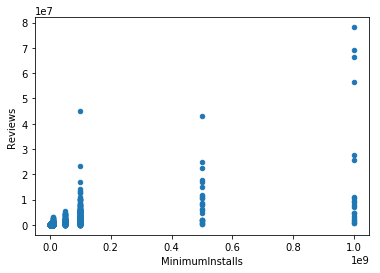

In [141]:
new_store.plot.scatter(x='MinimumInstalls', y='Reviews')

In [142]:
len(new_store['Category'].unique())

33

A seguir temos a soma de MinimumInstalls por categoria para investigar qual categoria tem mais instalações.

In [89]:
new_store.groupby('Category').agg({'MinimumInstalls': 'sum'})


,MinimumInstalls
Category,
ART & DESIGN,0
ART_AND_DESIGN,114838100
AUTO_AND_VEHICLES,53130211
BEAUTY,27197050
BOOKS & REFERENCE,0
BOOKS_AND_REFERENCE,1665980676
BUSINESS,697164865
COMICS,44981150
COMMUNICATION,11038776251


Como podemos perceber GAME é a categoria com mais instalações seguida de COMMUNICATION e TOOLS.

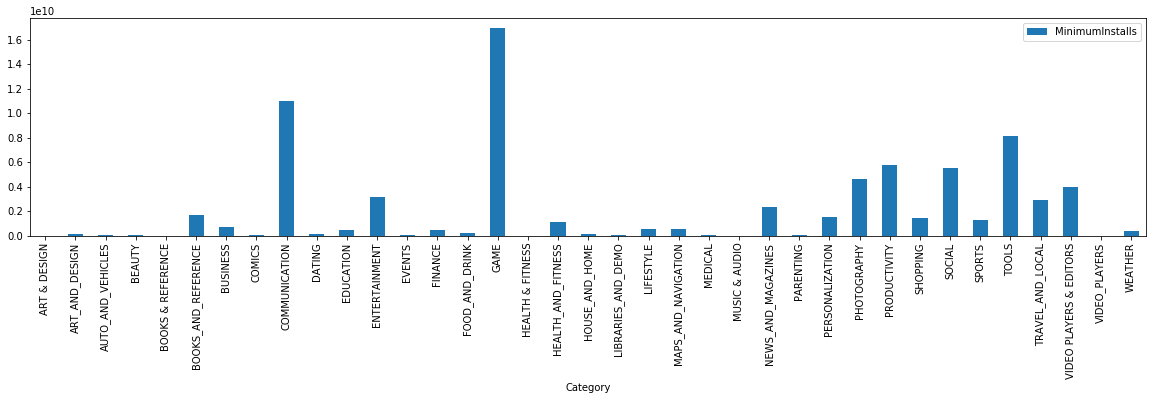

In [90]:
new_store.groupby('Category').agg({'MinimumInstalls': 'sum'}).plot(kind='bar', figsize=(20, 4))

Agora vamos investigar as categorias no quesito preços.

In [91]:
new_store.groupby('Category').agg({'Price($)': ['mean', 'median', 'max']})

Price($)                       \
                                        mean               median   
Category                                                            
ART & DESIGN                             nan                  nan   
ART_AND_DESIGN                      0.091846             0.000000   
AUTO_AND_VEHICLES                   0.158471             0.000000   
BEAUTY                              0.000000             0.000000   
BOOKS & REFERENCE                        nan                  nan   
BOOKS_AND_REFERENCE                 0.563333             0.000000   
BUSINESS                            0.417357             0.000000   
COMICS                              0.000000             0.000000   
COMMUNICATION                       0.263101             0.000000   
DATING                              0.120294             0.000000   
EDUCATION                           0.462534             0.000000   
ENTERTAINMENT                       2.812635             0.000000   
EVENTS                              1.718594             0.000000   
FINANCE                             8.408203             0.000000   
FOOD_AND_DRINK                      0.075714             0.000000   
GAME                                0.421336             0.000000   
HEALTH & FITNESS                         nan                  nan   
HEALTH_AND_FITNESS                  0.221897             0.000000   
HOUSE_AND_HOME                      0.000000             0.000000   
LIBRARIES_AND_DEMO                  0.011786             0.000000   
LIFESTYLE                           6.363531             0.000000   
MAPS_AND_NAVIGATION                 0.205725             0.000000   
MEDICAL                             2.520759             0.000000   
MUSIC & AUDIO                       0.000000             0.000000   
NEWS_AND_MAGAZINES                  0.015669             0.000000   
PARENTING                           0.159667             0.000000   
PERSONALIZATION                     0.400213             0.000000   
PHOTOGRAPHY                         0.420925             0.000000   
PRODUCTIVITY                        0.670936             0.000000   
SHOPPING                            0.027129             0.000000   
SOCIAL                              0.066820             0.000000   
SPORTS                              0.305810             0.000000   
TOOLS                               0.322766             0.000000   
TRAVEL_AND_LOCAL                    0.228082             0.000000   
VIDEO PLAYERS & EDITORS             0.063394             0.000000   
VIDEO_PLAYERS                            nan                  nan   
WEATHER                             0.410380             0.000000   

                                              
                                         max  
Category                                      
ART & DESIGN                             nan  
ART_AND_DESIGN                      1.990000  
AUTO_AND_VEHICLES                   9.990000  
BEAUTY                              0.000000  
BOOKS & REFERENCE                        nan  
BOOKS_AND_REFERENCE                 6.490000  
BUSINESS                           89.990000  
COMICS                              0.000000  
COMMUNICATION                      19.990000  
DATING                              7.990000  
EDUCATION                          39.990000  
ENTERTAINMENT                     399.990000  
EVENTS                            109.990000  
FINANCE                           399.990000  
FOOD_AND_DRINK                      4.990000  
GAME                               19.990000  
HEALTH & FITNESS                         nan  
HEALTH_AND_FITNESS                  9.990000  
HOUSE_AND_HOME                      0.000000  
LIBRARIES_AND_DEMO                  0.990000  
LIFESTYLE                         400.000000  
MAPS_AND_NAVIGATION                11.990000  
MEDICAL                           200.000000  
MUSIC & AUDIO                       0.000000  
NEWS_A

As aplicações das categorias FINANCE e LIFESTYLE são as que tem o preço médio maior e perceba que comparando com a análise do gráfico anterios estas categorias não são as mais baixadas. A mediana não aparece visualmente no gráfico porque a maioria dos apps são grátis, logo a mesma é zero. 

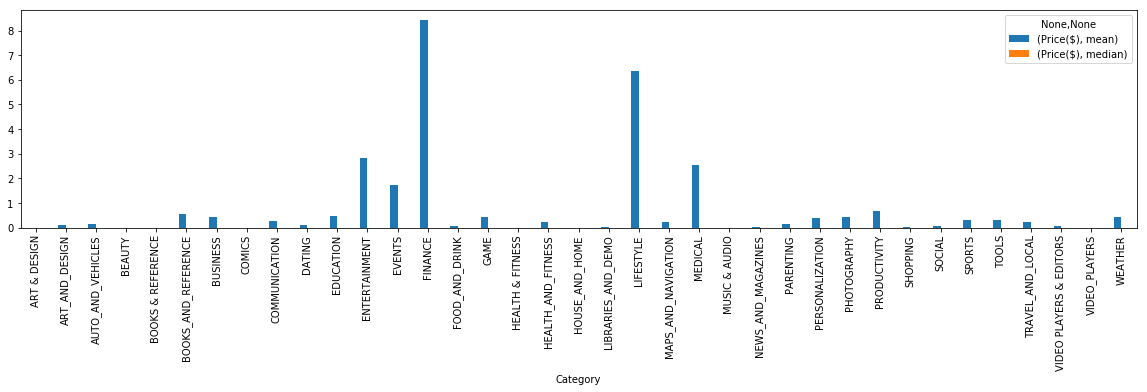

In [92]:
new_store.groupby('Category').agg({'Price($)': ['mean', 'median']}).plot(kind='bar', figsize=(20, 4))

In [93]:
#Mostrando que a maioria dos apps são grátis
print(new_store[new_store['Type'] == 'Free'].shape)
print(new_store.shape)
print(8904/9660*100)

(8904, 22)
(9660, 22)
92.17391304347827


Outro ponto de interesse é a são a quantidade de instalações por categoria mas agora olhando as preferências da faixa etária.  Para o público em geral(Everyone), as categorias de sucesso são as mesmas que vistas acima: principalmente jogos e comunicação. Para acima de 10 anos(Everyone 10+) os favoritos são jogos e jornais e revistas. Para os que estão acima dos 13(Teen) os mais atrativos são apps sociais, jogos e gravadores e editores de vídeo. Os acima de 17(Mature 17+) preferem apps sociais principalmente seguido de maneira equilibrada entre jogos e jornais e revistas. Adultos não possuem dados suficientes para uma boa visualização. Atenção a que toda vez que estiver sendo citado o** público** está sendo referido ao app direcionado a uma faixa etária. Nada impede de pessoas usarem apps de faixas etárias distintas; a ausência do termo é para simplificação e evitar a repetição das palavras.

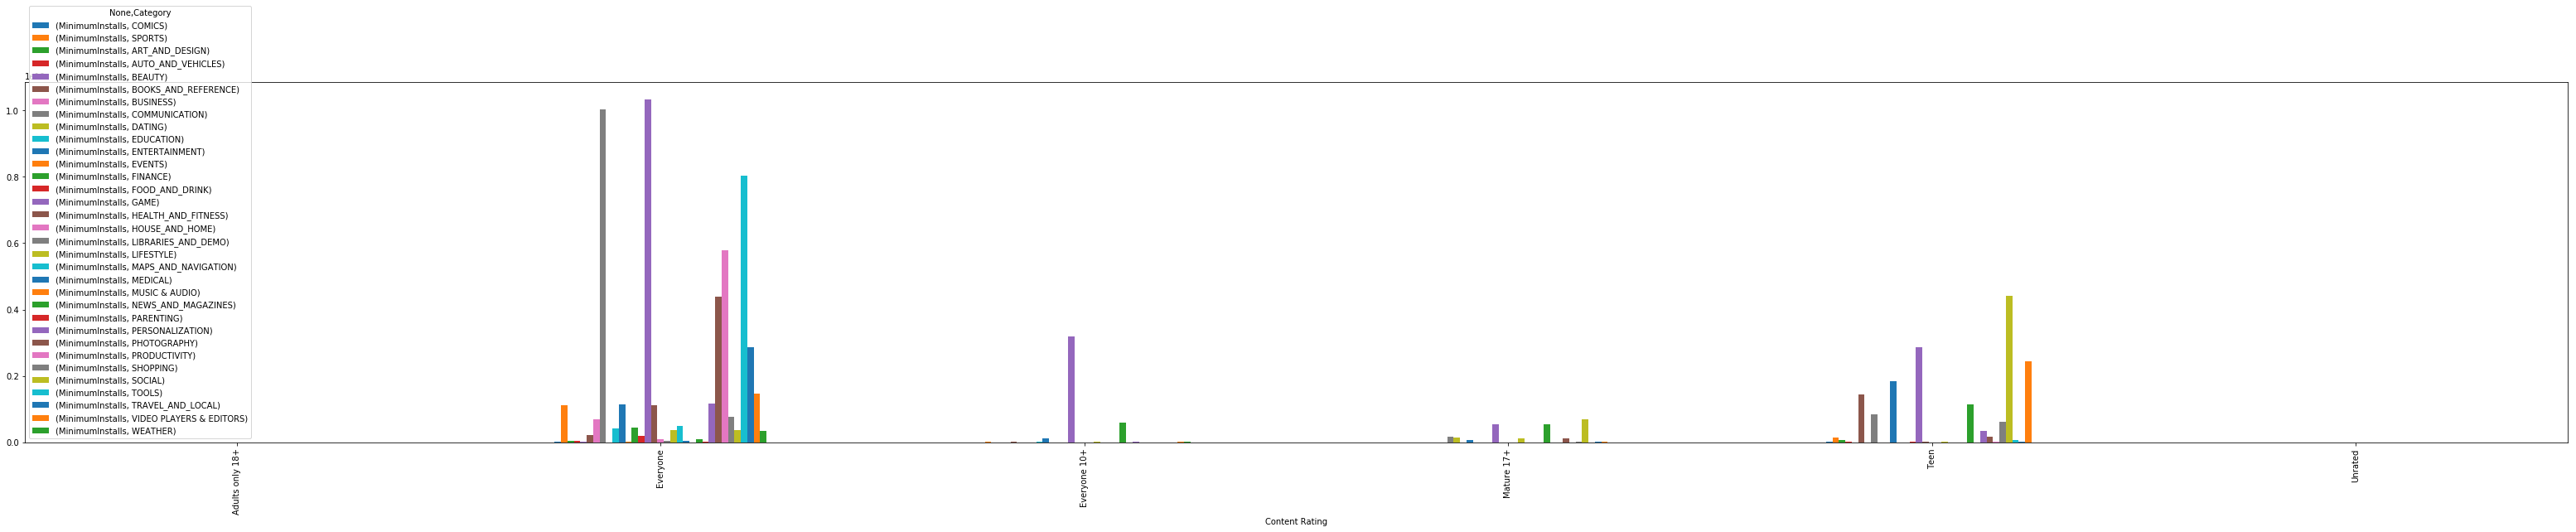

In [94]:
new_store.groupby(['Content Rating', 'Category']).agg({'MinimumInstalls':'sum'}).unstack().plot(kind='bar', figsize=(55, 8), legend='best')

De maneira geral, percebemos que todos as categorias conseguem boas notas médias e medianas. 

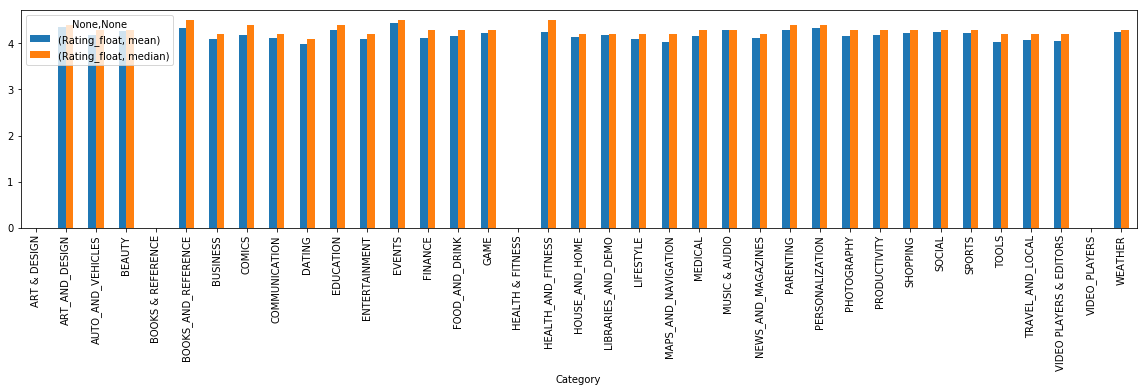

In [95]:
new_store['Rating_float'] = new_store['Rating'].astype('float64')
new_store.groupby('Category').agg({'Rating_float': ['mean', 'median']}).plot(kind='bar', figsize=(20, 4))

Agora está sendo checado quais categorias possuem mais apps que podem ser chamados de família. A maioria são jogos, seguido de entretenimento e educação logo atrás.

In [96]:
new_store[new_store['isFamily'] == 1].groupby('Category').agg({'Category': ['count']}) 

,Category
,count
Category,
ART & DESIGN,0
ART_AND_DESIGN,4
AUTO_AND_VEHICLES,0
BEAUTY,0
BOOKS & REFERENCE,0
BOOKS_AND_REFERENCE,3
BUSINESS,0
COMICS,0


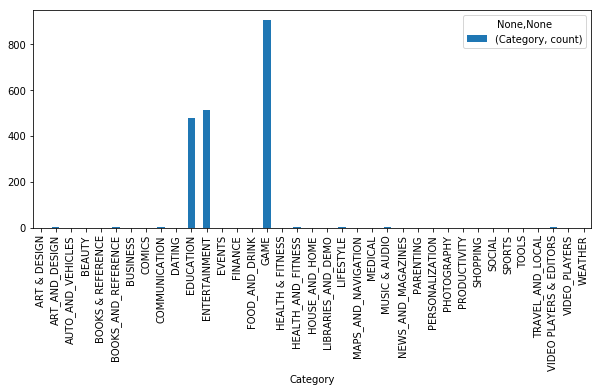

In [97]:
new_store[new_store['isFamily'] == 1].groupby('Category').agg({'Category': ['count']}).plot(kind='bar', figsize=(10, 4))

Subcategorias de apps familiares mais instaladas. Ação e Aventura se destaca quando desconsideramos os dados que não foram informados. 

In [98]:
new_store[new_store['isFamily'] == 1].groupby('FamilyCategory').agg({'MinimumInstalls':'sum'})

,MinimumInstalls
FamilyCategory,
ACTION & ADVENTURE,682806501
BRAIN GAMES,239304100
CREATIVITY,64655600
EDUCATION,206345320
MUSIC & VIDEO,136301000
NaN,7295517784
PRETEND PLAY,260712200


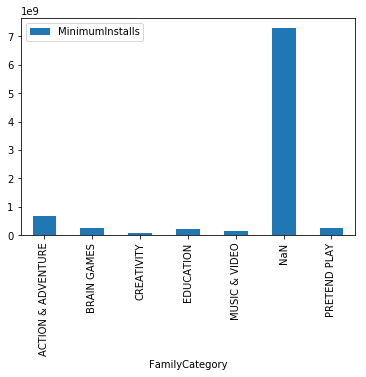

In [99]:

new_store[new_store['isFamily'] == 1].groupby('FamilyCategory').agg({'MinimumInstalls':'sum'}).plot(kind='bar')

Agora está sendo feita uma checagem da subcategoria familiar com apps, em média,  mais caros. São as categorias de faz de conta(pretend play) e criatividade.

In [100]:
new_store[new_store['isFamily'] == 1].groupby('FamilyCategory').agg({'Price($)':['mean', 'max']})

Price($)                     
                                   mean                  max
FamilyCategory                                              
ACTION & ADVENTURE             0.612813             6.990000
BRAIN GAMES                    0.578871             4.990000
CREATIVITY                     0.678000             3.990000
EDUCATION                      0.535476             7.490000
MUSIC & VIDEO                  0.090455             1.990000
NaN                            1.408945           399.990000
PRETEND PLAY                   0.927538             4.990000

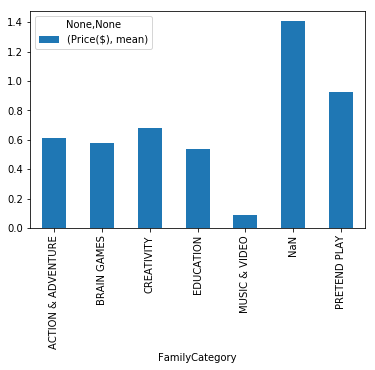

In [101]:
new_store[new_store['isFamily'] == 1].groupby('FamilyCategory').agg({'Price($)':['mean']}).plot(kind='bar')

In [102]:
new_store[new_store['isFamily'] == 1].groupby('FamilyCategory').agg({'Rating_float':['mean']})

,Rating_float
,mean
FamilyCategory,
ACTION & ADVENTURE,4.288298
BRAIN GAMES,4.362295
CREATIVITY,4.275000
EDUCATION,4.273418
MUSIC & VIDEO,4.213636
NaN,4.163209
PRETEND PLAY,4.225000


Nas subcategorias mais bem avalidas BRAIN GAMES um pouco mais de destaque que as demais.

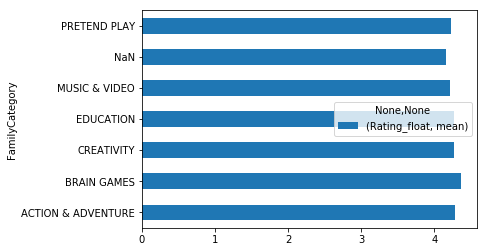

In [103]:
new_store[new_store['isFamily'] == 1].groupby('FamilyCategory').agg({'Rating_float':['mean']}).plot(kind='barh')

Quantidade de instalações de jogos por categorias. 

In [104]:
new_store[new_store['Category'] == 'GAME'].groupby('GameCategory').agg({'MinimumInstalls': ['sum']}) 

,MinimumInstalls
,sum
GameCategory,
ACTION,3536059690
ADVENTURE,412945320
ARCADE,3801339156
BOARD,125914410
CARD,153926100
CASINO,130260700
CASUAL,3405213740
EDUCATIONAL,234200966


Aqui uma comparação interessante: no gráfico da esquerda temos o total de jogos pertencente a dada categoria no dataset mas ao lado temos as categorias que possuem mais instalações. Apesar de ARCADE aparecer menos do dataset, seus jogos tem número de instalações superiores a categorias mais frequentes como ACTION e CASUAL. O contrário também pode ocorrer e isso fica notável quando olhamos para SIMULATION.

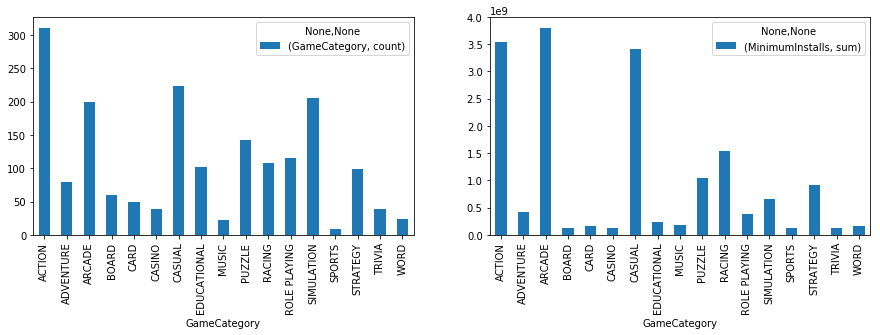

In [105]:

new_store[new_store['Category'] == 'GAME'].groupby('GameCategory').agg({'GameCategory': ['count']}).plot(kind='bar', figsize=(15,4), ax=plt.subplot(1, 2, 1))

new_store[new_store['Category'] == 'GAME'].groupby('GameCategory').agg({'MinimumInstalls': ['sum']}).plot(kind='bar', figsize=(15,4), ax=plt.subplot(1, 2, 2))

As subcategorias de jogos, em média, mais caras:

In [106]:
new_store[new_store['Category'] == 'GAME'].groupby('GameCategory').agg({'Price($)':'mean'})

,Price($)
GameCategory,
ACTION,0.296559
ADVENTURE,0.835625
ARCADE,0.300352
BOARD,0.865833
CARD,0.396327
CASINO,0.358974
CASUAL,0.218080
EDUCATIONAL,0.460392
MUSIC,0.180909


As categorias mais caras não as que aparecem mais frequentes nem as que possuem mais instalações:

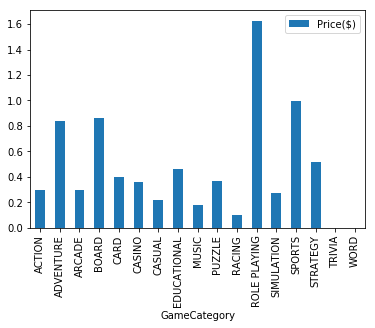

In [107]:
new_store[new_store['Category'] == 'GAME'].groupby('GameCategory').agg({'Price($)':'mean'}).plot(kind='bar')

As subcategorias de jogos mapeadas de acordo com a faixa etária:

In [108]:
new_store[new_store['Category'] == 'GAME'].groupby(['Content Rating', 'GameCategory']).agg({'MinimumInstalls':'sum'})

MinimumInstalls
Content Rating GameCategory                 
Everyone       ACTION             1433701730
               ADVENTURE           165405220
               ARCADE             1967591146
               BOARD               119704310
               CARD                 77493500
               CASINO                1005100
               CASUAL             2976926230
               EDUCATIONAL         231104966
               MUSIC               178011500
               PUZZLE             1006166661
               RACING             1257607320
               ROLE PLAYING         90042720
               SIMULATION          349473310
               SPORTS              116700000
               STRATEGY             88182500
               TRIVIA              117496470
               WORD                163161550
Everyone 10+   ACTION              405543550
               ADVENTURE           163350000
               ARCADE             1520637000
               BOARD                 5100000
               CARD                 11000000
               CASUAL              287112000
               EDUCATIONAL            650000
               MUSIC                  100000
               PUZZLE                1600000
               RACING               82800000
               ROLE PLAYING        114925000
               SIMULATION           68410010
               SPORTS               10000000
               STRATEGY            521425005
               WORD                    10000
Mature 17+     ACTION              443051110
               ADVENTURE            16510100
               ARCADE                2000000
               CARD                    50000
               CASUAL                 500000
               MUSIC                 1010000
               RACING               22500000
               ROLE PLAYING         11500000
               SIMULATION           16515000
               STRATEGY             20100000
               WORD                  5001000
Teen           ACTION             1253763300
               ADVENTURE            67680000
               ARCADE              311111010
               BOARD                 1110100
               CARD                 65382600
               CASINO              129255600
               CASUAL              140675510
               EDUCATIONAL           2446000
               MUSIC                 1100000
               PUZZLE               26720150
               RACING              170600000
               ROLE PLAYING        166973050
               SIMULATION          230910000
               STRATEGY            287080100
               TRIVIA               11110000
               WORD                  1000000

No geral, para todos os públicos casual é o mais instalado, seguido de arcade e ação. Ação é o favorito dos apps para TEENS e para MATURES. Jás os que pertencem a faixa Everyone 10+ são preferidos arcade seguido de estratégia.

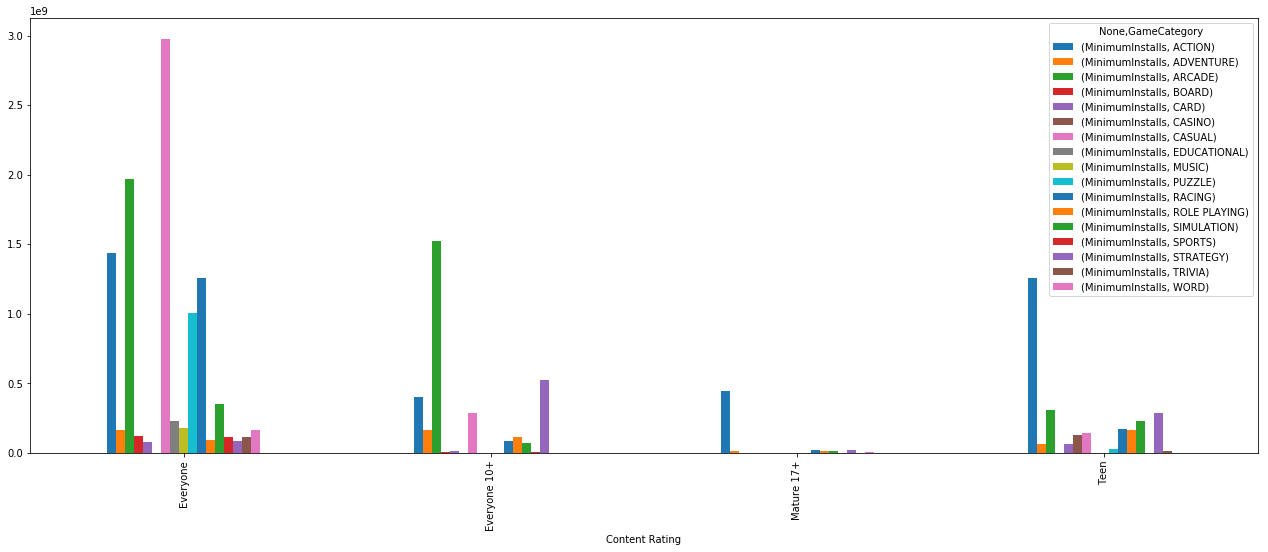

In [109]:
new_store[new_store['Category'] == 'GAME'].groupby(['Content Rating', 'GameCategory']).agg({'MinimumInstalls':'sum'}).unstack().plot(kind='bar', figsize=(22, 8))

As categorias de jogos mais bem avaliadas:

In [110]:
new_store[new_store['Category'] == 'GAME'].groupby('GameCategory').agg({'Rating_float':['mean', 'median', 'max']})

Rating_float                                          
                             mean               median                  max
GameCategory                                                               
ACTION                   4.247697             4.300000             5.000000
ADVENTURE                4.191026             4.300000             4.700000
ARCADE                   4.277838             4.300000             5.000000
BOARD                    4.287719             4.300000             4.800000
CARD                     4.076087             4.250000             4.900000
CASINO                   4.286486             4.400000             4.700000
CASUAL                   4.139352             4.200000             5.000000
EDUCATIONAL              4.100000             4.200000             4.800000
MUSIC                    4.219048             4.300000             4.700000
PUZZLE                   4.370968             4.400000             5.000000
RACING                   4.174757             4.200000             5.000000
ROLE PLAYING             4.272072             4.300000             4.800000
SIMULATION               4.154500             4.200000             5.000000
SPORTS                   4.437500             4.500000             4.600000
STRATEGY                 4.227368             4.300000             4.800000
TRIVIA                   4.039286             4.250000             5.000000
WORD                     4.340909             4.300000             4.900000

Apesar de pouco protagonismo nas análises até agora, com esforço, podemos ver que SPORTS tem as melhores notas. 

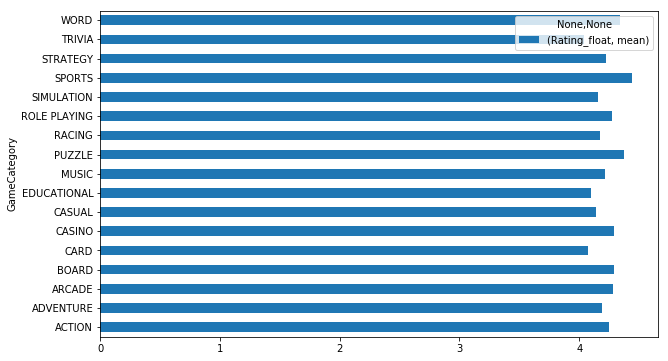

In [111]:
new_store[new_store['Category'] == 'GAME'].groupby('GameCategory').agg({'Rating_float':['mean']}).plot(kind='barh', figsize=(10, 6))

A média de preços de apps na Google Play Store passando pelas versões do android.

In [112]:
new_store.groupby('Android Ver').agg({'Price($)':'mean'})

,Price($)
Android Ver,
1.0 and up,0.000000
1.5 and up,0.926500
1.6 and up,4.949397
2.0 and up,0.248125
2.0.1 and up,1.921429
2.1 and up,0.504060
2.2 - 7.1.1,0.000000
2.2 and up,0.871423
2.3 and up,0.387585


Vemos uma série de altos e baixos na variabiliadade dos preços. Além disso algumas destas categorias não possuem dados suficientes para uma análise mais fiel e detalhada. De maneira suscinta, percebemos que com no começo do sistema operacional Android houve uma alta de preços que se mantou variável não tão alta ao longo do tempo até versões próximas do 7.1 onde houve uma 'explosão' no valor dos preços.

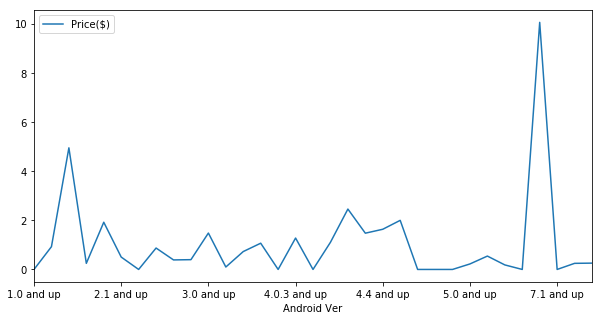

In [113]:
new_store.groupby('Android Ver').agg({'Price($)':'mean'}).plot(kind='line', figsize=(10, 5))

Esta análise visa entender como os apps foram avaliados durante suas versões. Estamos usando Rating como uma métrica de qualidade porém em certas versões não temos dados suficientes o que gera gaps no gráfico.

In [114]:
new_store.groupby('Android Ver').agg({'Rating_float': 'mean'})

,Rating_float
Android Ver,
1.0 and up,4.050000
1.5 and up,4.050000
1.6 and up,4.087356
2.0 and up,4.370370
2.0.1 and up,4.328571
2.1 and up,4.146429
2.2 - 7.1.1,nan
2.2 and up,3.977340
2.3 and up,4.093248


Como está sendo notado não existe padrões e a ausência de dados dificulta a investigação deixando a nos afirma que durante as versões do Android a qualidade dos apps é bem variável.

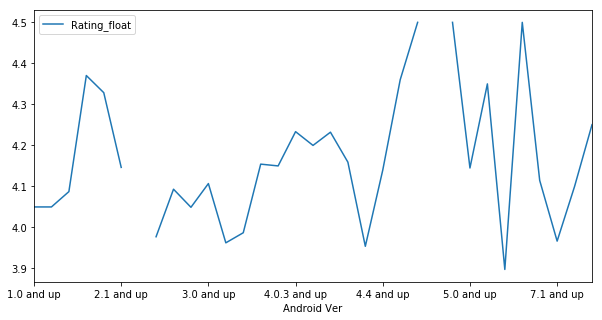

In [115]:
new_store.groupby('Android Ver').agg({'Rating_float': 'mean'}).plot(kind='line', figsize=(10,5))

### Análise de Dados II: Testes de Hipótese

Será checado se existem diferença entre as categorias em relação a preço.

In [116]:
print(new_store[new_store['GameCategory'] == 'ACTION'].shape)
print(new_store[new_store['GameCategory'] == 'CASUAL'].shape)
print(new_store[new_store['GameCategory'] == 'SIMULATION'].shape)

(311, 23)
(224, 23)
(206, 23)


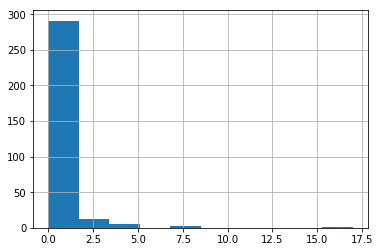

In [117]:
new_store[new_store['GameCategory'] == 'ACTION']['Price($)'].hist()

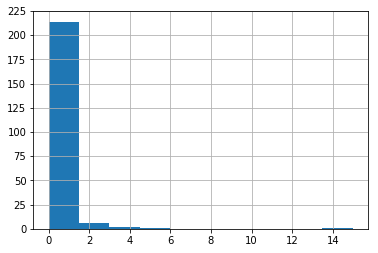

In [118]:
new_store[new_store['GameCategory'] == 'CASUAL']['Price($)'].hist()

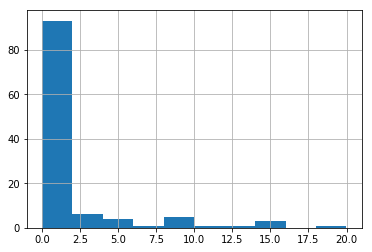

In [119]:
new_store[new_store['GameCategory'] == 'ROLE PLAYING']['Price($)'].hist()

In [0]:
from scipy import stats

Este teste será utilizado porque temos grupos não pareados e as amostras são não paramétricas. Podemos embaixo que Ação e Casual não possuem diferença significativa em relação a seu preço. 

In [121]:
stats.mannwhitneyu(new_store[new_store['GameCategory'] == 'ACTION']['Price($)'], new_store[new_store['GameCategory'] == 'CASUAL']['Price($)'])

MannwhitneyuResult(statistic=34124.0, pvalue=0.19488600823644125)

Jogos casuais e rpgs têm diferenças significativas em seu preço. Perceba que mais para cima foram mostrados os gráficos de como os preços destes se comportam sendo o rpg bastate caro e casual razoavelmente barato.

In [122]:
stats.mannwhitneyu(new_store[new_store['GameCategory'] == 'CASUAL']['Price($)'], new_store[new_store['GameCategory'] == 'ROLE PLAYING']['Price($)'])

MannwhitneyuResult(statistic=10953.5, pvalue=2.357381279363343e-05)

In [123]:
new_store[new_store['isFamily'] == 1].shape 

(1909, 23)

In [124]:
print(new_store[(new_store['isFamily'] == 1) & (new_store['Content Rating'] == 'Everyone 10+')].shape)
print(new_store[(new_store['isFamily'] == 0) & (new_store['Content Rating'] == 'Everyone 10+')].shape)

(124, 23)
(198, 23)


Vamos observar se existe diferença a apps entre  a apps para o público acima de 10 anos em relação a quantidade mínima de instalações considerando se são ou não apps familiares:

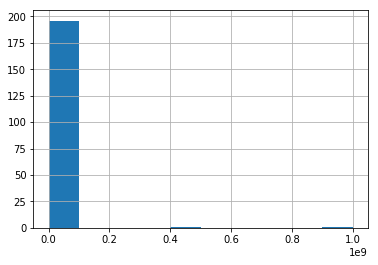

In [125]:
new_store[(new_store['isFamily'] == 0) & (new_store['Content Rating'] == 'Everyone 10+')]['MinimumInstalls'].hist()

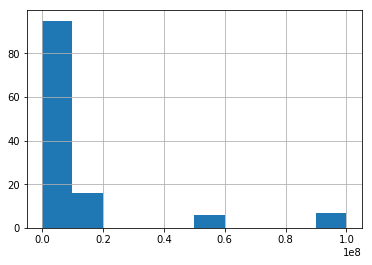

In [126]:
new_store[(new_store['isFamily'] == 1) & (new_store['Content Rating'] == 'Everyone 10+')]['MinimumInstalls'].hist()

Não é significativamente relevante como vemos abaixo se o app para os 10 a mais é de famílida ou não.

In [127]:
stats.mannwhitneyu(new_store[(new_store['isFamily'] == 0) & (new_store['Content Rating'] == 'Everyone 10+')]['MinimumInstalls'], new_store[(new_store['isFamily'] == 1) & (new_store['Content Rating'] == 'Everyone 10+')]['MinimumInstalls'])

MannwhitneyuResult(statistic=11341.0, pvalue=0.12317359765001107)

In [128]:
print(new_store[(new_store['Type'] == 'Free')].shape)
print(new_store[new_store['Type'] == 'Paid'].shape)

(8904, 23)
(755, 23)


Neste teste será observado se o app ser pago ou grátis faz diferença nas Reviews.

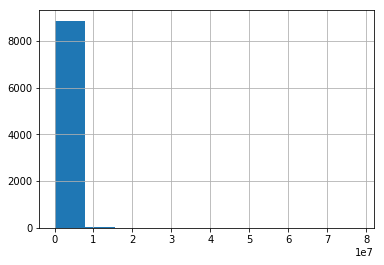

In [129]:
new_store[(new_store['Type'] == 'Free')]['Reviews'].hist()

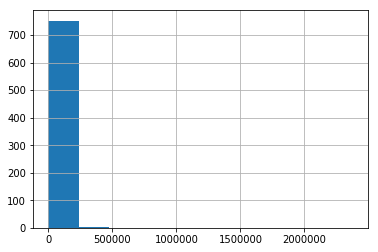

In [130]:
new_store[new_store['Type'] == 'Paid']['Reviews'].hist()

Como vemos, o p-value < 0.05 implica um forte indício de que há uma diferença significante.

In [131]:
stats.mannwhitneyu(new_store[(new_store['Type'] == 'Free')]['Reviews'], new_store[new_store['Type'] == 'Paid']['Reviews'])

MannwhitneyuResult(statistic=2265965.0, pvalue=1.882095170655616e-50)

In [132]:
print(new_store[new_store['Content Rating'] == 'Teen'].shape)
print(new_store[new_store['Content Rating'] == 'Mature 17+'].shape)

(1036, 23)
(393, 23)


Será observado se há diferença nas Reviews de apps para público Teen e apps para o público Mature.

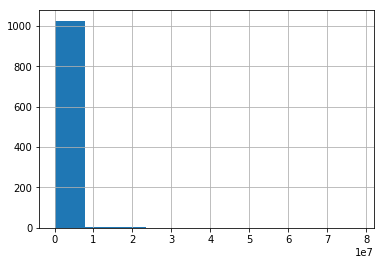

In [133]:
new_store[new_store['Content Rating'] == 'Teen']['Reviews'].hist()

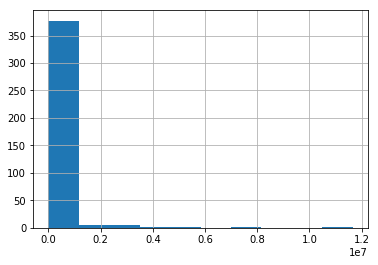

In [134]:
new_store[new_store['Content Rating'] == 'Mature 17+']['Reviews'].hist()

Como pode se concluir, existe diferença.

In [135]:
stats.mannwhitneyu(new_store[new_store['Content Rating'] == 'Teen']['Reviews'], new_store[new_store['Content Rating'] == 'Mature 17+']['Reviews'])

MannwhitneyuResult(statistic=188635.5, pvalue=0.015988979145335085)

Comparação de aplicativos em diferentes versões do android para saber se existe diferença no preço.

In [136]:
print(new_store[new_store['Android Ver'] == '4.4 and up'].shape)
print(new_store[new_store['Android Ver'] == '5.0 and up'].shape)

(818, 23)
(512, 23)


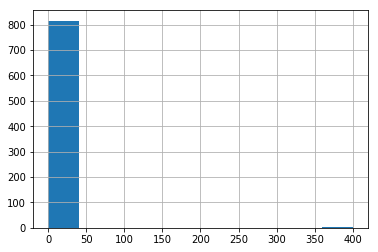

In [137]:
new_store[new_store['Android Ver'] == '4.4 and up']['Price($)'].hist()

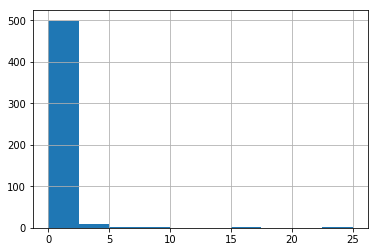

In [138]:
new_store[new_store['Android Ver'] == '5.0 and up']['Price($)'].hist()

Não é significante.

In [139]:
stats.mannwhitneyu(new_store[new_store['Android Ver'] == '4.4 and up']['Price($)'], new_store[new_store['Android Ver'] == '5.0 and up']['Price($)'])

MannwhitneyuResult(statistic=207545.0, pvalue=0.23224558669204576)